# <center>Деревья решений в контексте задач классификации и регрессии
Начнём с постановки задачи машинного обучения — для этого рассмотрим конкретный пример, а затем обобщим его с помощью математического аппарата.

У нас есть набор из 500 объектов, которые описываются пятью какими-то характеристиками. Например, это могут быть 500 пациентов, у которых измерили пять медицинских параметров: вес, рост, давление, количество лейкоцитов в крови и уровень сахара.

В паре с объектом всегда идёт целевая переменная, которую необходимо научиться предсказывать. Например, целевой переменной может быть признак болезни: 1 — болен диабетом, 0 — не болен диабетом.

**Наша цель** — построить модель машинного обучения, которая на основе характеристик объекта предсказывает целевую переменную. Для нашего примера это будет модель, которая на основе медицинских параметров выдаёт свой прогноз о наличии у пациента диабета.

Это была классическая постановка задачи машинного обучения в свободной форме. Давайте теперь посмотрим, как будет выглядеть та же самая задача на языке математики.

Пусть задано обучающее множество пар объектов и ответов к ним $Q=\{(x,y)\}$, где $x \in X$  — векторы из $\mathbb{R}^M$, описываемые $M$ координатами (признаками), $y \in Y$ — целевая метка объекта, $|Q| = N$. Множество $Y$ может быть непрерывным (задача регрессии) с мощностью $|Y| = N$ или дискретным (задача классификации) с мощностью $|Y| = K$, где $K$ — количество классов.

* $x=(x_1, x_2, x_3, x_4, x_5)$ — один отдельный пациент;
* $x_j$ — признак (фактор), описывающий его;
* $X$ — множество всех пациентов;
* $N=500$ — количество пациентов;
* $M=5$ — количество признаков, описывающих пациентов;
* $Y=\{0,1\}$ — множество уникальных классов объектов;
* $K=2$ — количество классов (мощность множества $Y$).

**Наша цель** — составить такую функцию/модель $f(x)$, которая наилучшим образом определяет зависимость между векторами $x$ из множества $X$ и целевой переменной $y$ из множества $Y$ — $f:X \to Y$.

Строго говоря, такую функцию мы будем искать не в аналитическом виде, как мы делали, например, в случае линейной регрессии, а в виде алгоритма, то есть в виде последовательности действий. Обычно в математике алгоритм обозначается как $a(x)$ или $a:X \to Y$.

Алгоритм $a(x)$ мы будем искать в семействе деревьев решений.

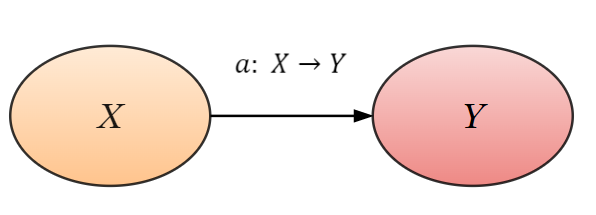

# <center>Определение решающего дерева
>Если говорить простыми словами, **обученное дерево решений** — это последовательность вопросов, которые задаются поступающим на его вход объектам.

Например:

* «Рост $\leq$ 170 см?» 
* «Вес $\leq$ 60 кг?»
* «Содержание сахара $\leq$ 70 мг/дл?»

В зависимости от того, выполняется ли заданное в вопросе условие, объект переходит к одному из следующих вопросов, и так происходит до тех пор, пока не будет получен конечный результат — прогноз дерева решений для данного объекта. Всё это очень напоминает стандартные рассуждения по принципу «если…, то».

Последовательность вопросов можно оформить в виде вершин графа, структура которого будет напоминать перевёрнутое дерево.

Пройдя путь, который зависит от характеристик объекта, через последовательность от первого вопроса (корня дерева) до финального ответа (листа) мы можем определить значение целевой переменной. В задаче регрессии финальный ответ дерева — некоторое число, а в задаче классификации — класс объекта.

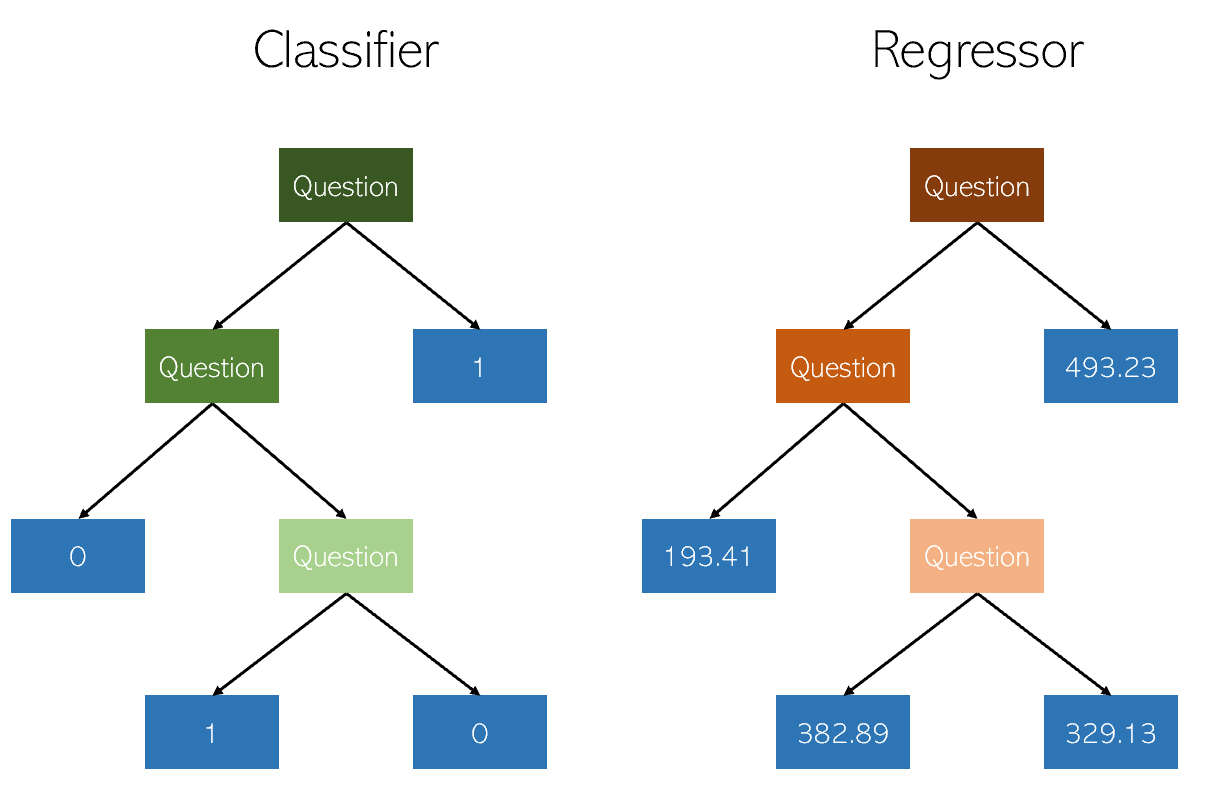

>**Дерево решений** представляет собой последовательность условий вида $x_j \leq t $, которые называются **предикатами**, или **решающими правилами**.

Формально сами предикаты в вершинах мы ранее обозначали как:
$$ B_v (x_j, t) = I[x_j \leq t] $$
где $v$ — номер вершины графа, а $I$ с квадратными скобками $[]$ — обозначение индикаторной функции (она равна 1 (True), если условие внутри скобок выполняется, и 0 (False) — в противном случае).

Каждый предикат разделяет множество объектов $X$ на два подмножества:

* левое — множество тех объектов, для которых заданное в предикате условие выполняется: $X^{left} = \{x|x_j \leq t\}$;
* правое — множество тех объектов, для которых условие ложно: $X^{right} = X \backslash X^{left} = \{x|x_j > t\}$.

Последовательность предикатов лучше всего представлять в виде **ациклического связного графа**.  
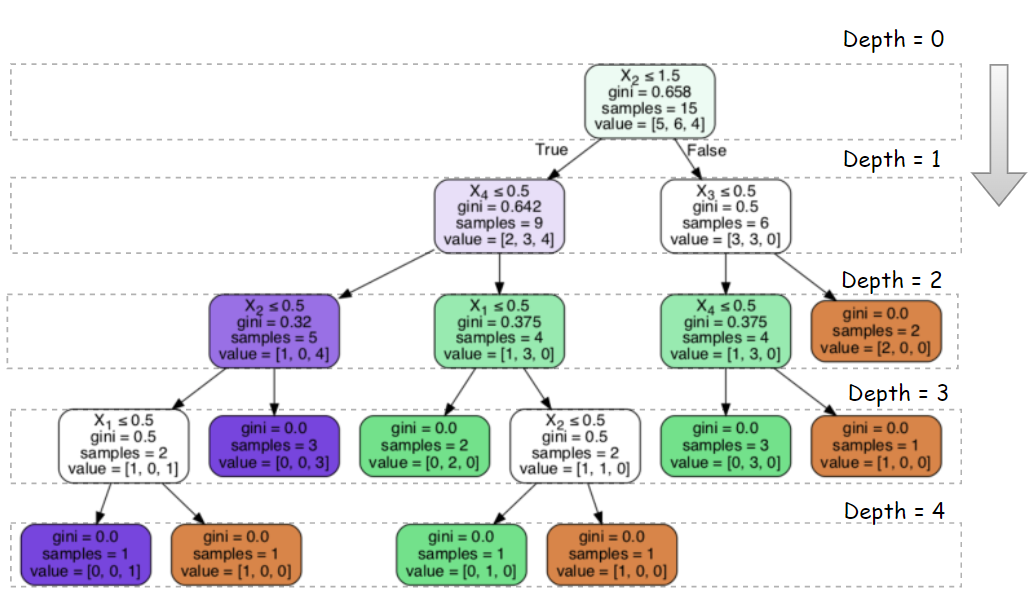
Информация, указанная в вершинах графа, определяется во время обучения дерева решений
* $x_j \leq t$ — условие предиката;
* *gini* — значение критерия информативности (в данном случае используется критерий Джини);
* *samples* — число объектов из обучающей выборки, попавших в вершину;
* *value* — число объектов каждого из классов из обучающей выборки, попавших в вершину.

В построенном графе выделяют **три типа вершин**:
* корневая вершина (*root node*) — то, откуда всё начинается;
* внутренние вершины (*intermediate nodes*);
* листья (*leafs*) — конечные вершины дерева, в которых определяется конечный «ответ» — прогноз дерева решений.

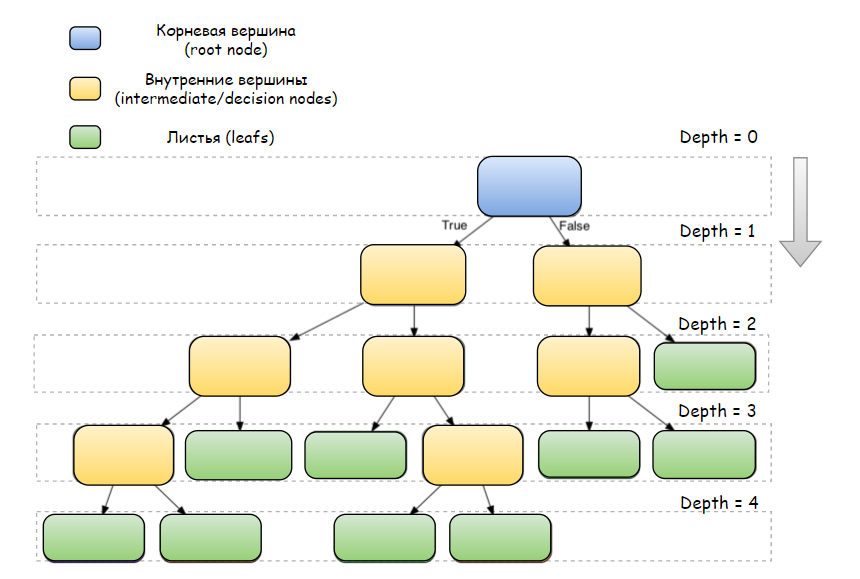

Вершины графа группируются в уровни, которые называются **глубиной дерева (depth)**. Отсчёт уровней ведётся с 0 (то есть корневая вершина не считается при подсчёте глубины дерева).

Корневая и внутренние вершины содержат предикаты $B_v(x_j, t)$, на основе которых организуется движение по графу. В ходе предсказания осуществляется проход по дереву к некоторому листу. Для каждого объекта из выборки движение начинается из корня.

В вершине $v$ проход осуществляется влево, если для объекта $x$ условие, записанное в предикате, выполняется, то есть $B_v(x_j, t) = 1$, и вправо, если условие является для объекта $x$ ложным, то есть $B_v(x_j, t) = 0$. Проход продолжается до момента, пока будет достигнут некоторый лист. Ответом алгоритма для объекта $x$ считается прогноз $\hat{y}=a(x)$, приписанный этому листу.

В задаче **регрессии** прогноз целевой переменной $\hat{y}$ будет определяться принципом усреднения, то есть объекту $x$ в качестве прогноза присваивается среднее (или медианное) значение целевой переменной по объектам, попавшим в лист на этапе обучения дерева.

В задаче **классификации** прогноз целевой переменной $\hat{y}$ будет определяться принципом голосования большинства, то есть объекту $x$ присваивается самый популярный класс объектов, попавших в лист на этапе обучения дерева.

**Пример**  
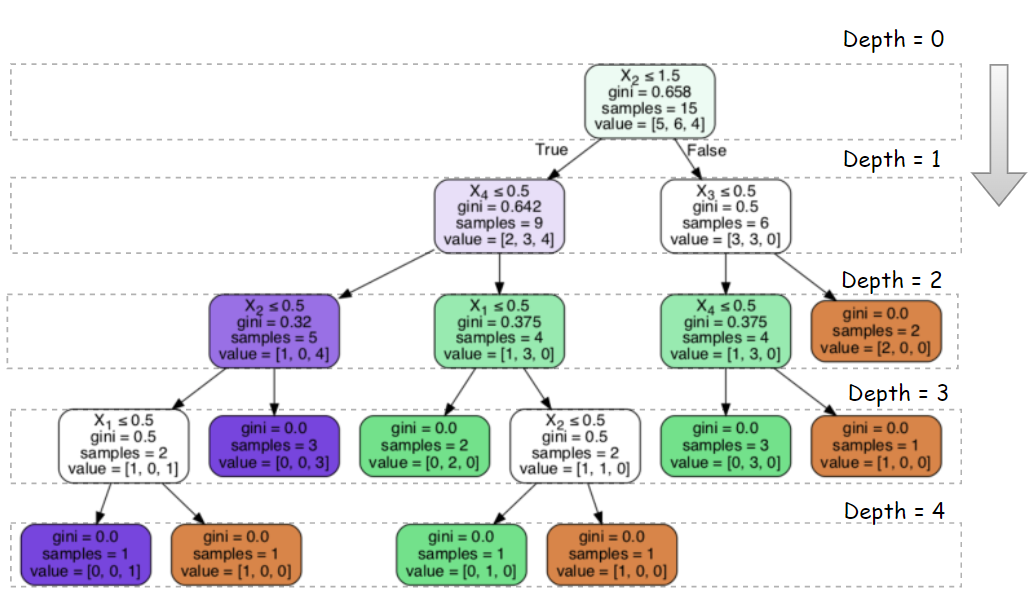

Пусть появился новый объект $x$. Ещё раз напомним, что под переменной $x$ может скрываться всё что угодно: пациент, автомобиль, клиент банка и т. д.

Этот объект представляется в виде четырёхмерного вектора-строки. Пусть он будет иметь следующий вид:
$$ x = (x_1, x_2, x_3, x_4) = (1, 1, 1, 0) $$
Каждая координата вектора $x$ — это некоторая характеристика объекта, например, вес, рост, давление и т. д.

Необходимо определить прогноз дерева решений — класс объекта $\hat{y}=a(x)$. Классы обозначены метками от 0 до 2.

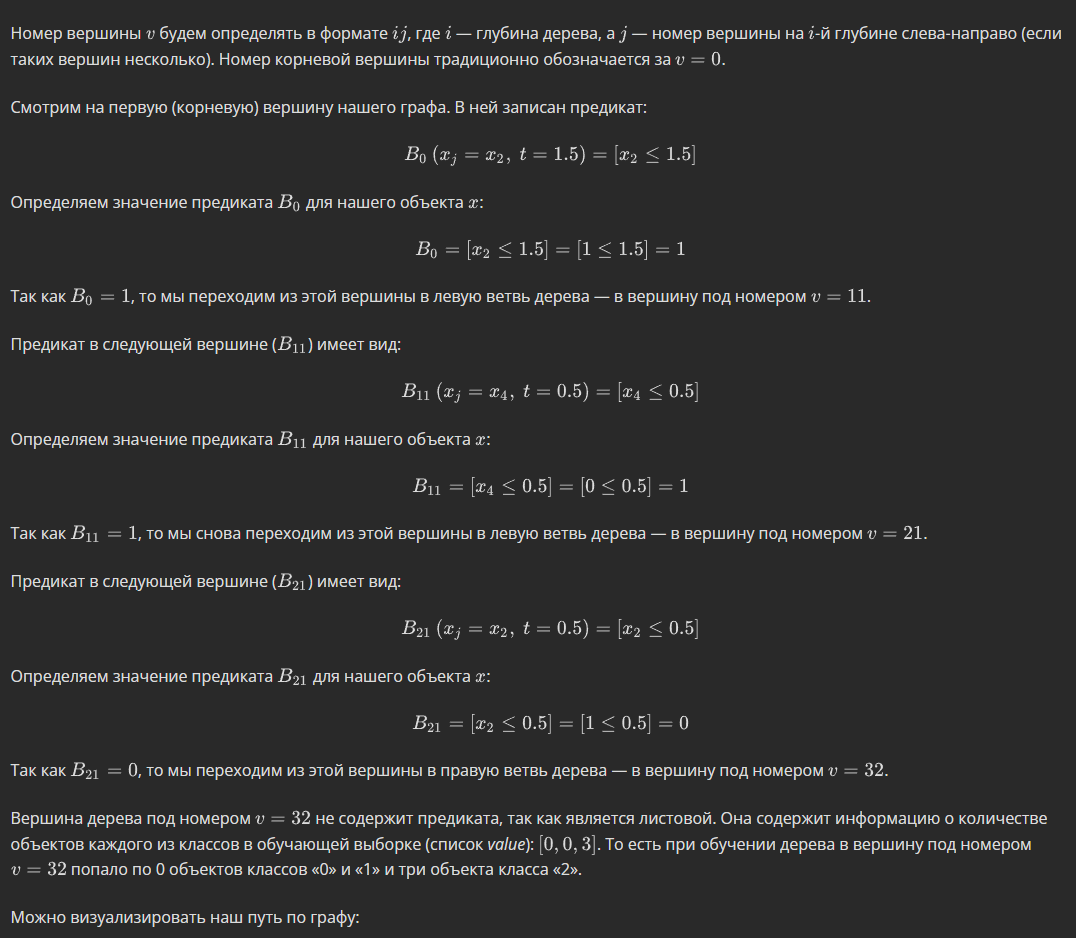  
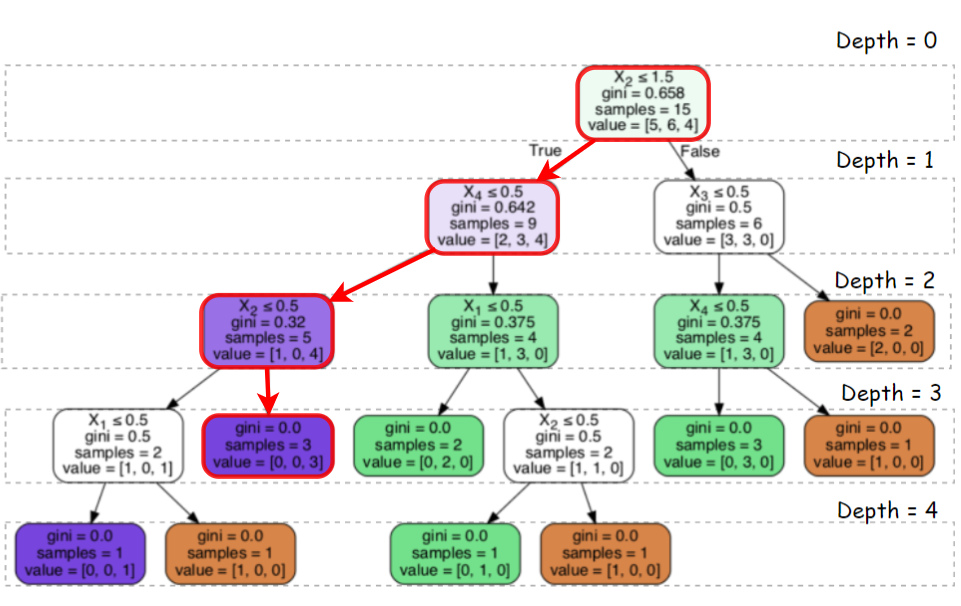

Класс объекта будет определён как наиболее популярный в конечной вершине, то есть:
$$ \hat{y} = a(x) = \text{argmax}([0, 0, 3]) = 2 $$
***
>**В случае задачи регрессии (Decision Tree Regressor)** ответ модели (значение целевого признака) будет определяться как среднее значение целевой переменной $y$ внутри области $R_p$, соответствующей листовой вершине. Математически это записывается следующим образом:
$$ \hat{y} = a(x) = \frac{1}{|R_p|} \sum_{y \in R_p}y $$

Запись $\sum_{y \in R_p}y$ здесь означает, что значение  для суммирования берётся для тех объектов, которые принадлежат множеству $R_p$, то есть сумма считается только для тех объектов, которые попадают в область, обозначенную как $R_p$.
***
**Пример разделяющей поверхности дерева решений в случае задачи регрессии**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

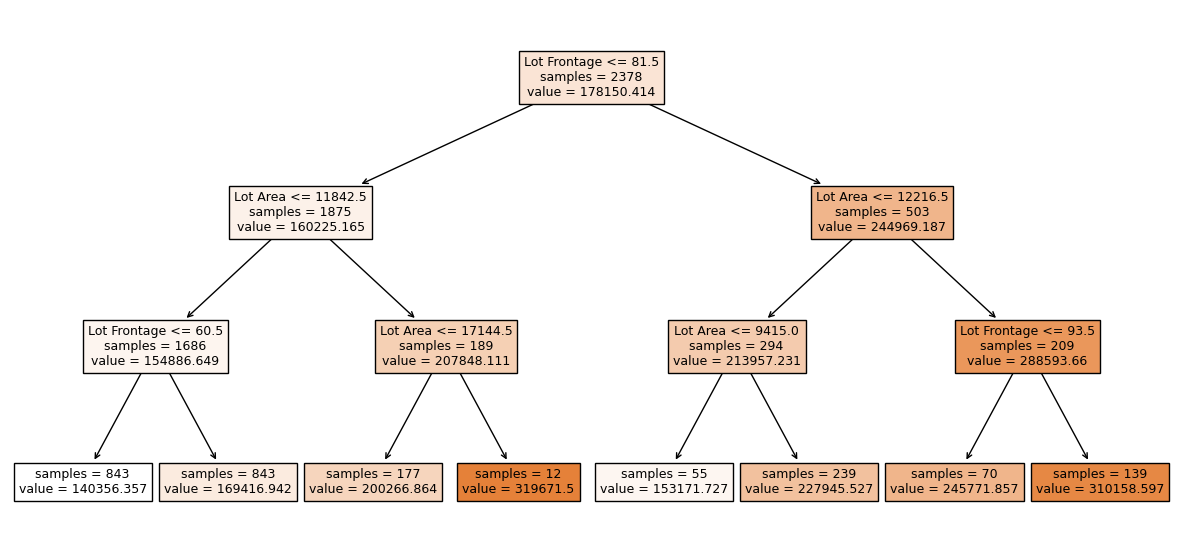

In [4]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.zip')
ames_data = ames_data[(ames_data['Lot Frontage'] <= 150) & (ames_data['Lot Area'] <= 20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию `plot_decision_bound_regression()`:

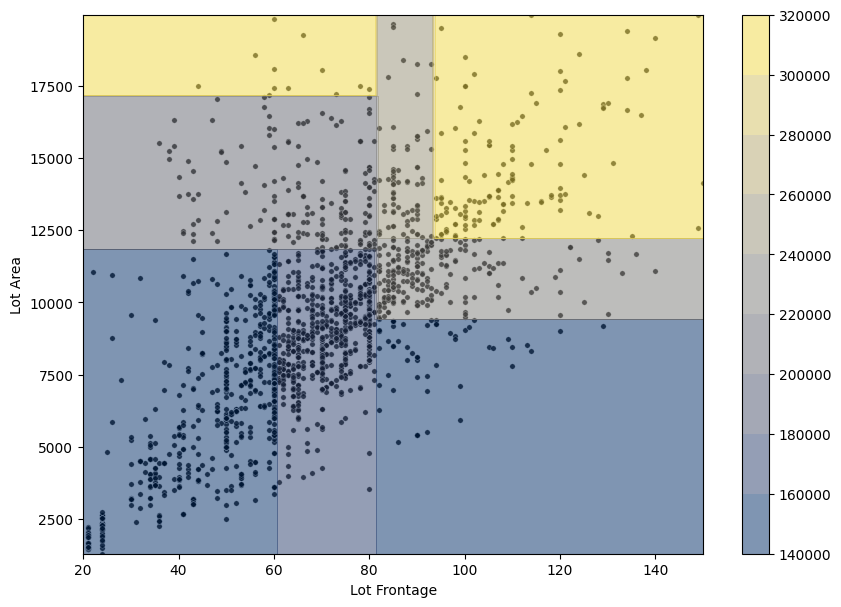

In [5]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)


В результате построения дерева решений было образовано восемь областей $ (R_1, R_2, \dots, R_8) $, соответствующих каждому из восьми листьев. В каждой из областей было рассчитано предсказание дерева для этой области $\hat{y}$ — среднее арифметическое целевой переменной $y$ (они отражены на тепловой шкале справа от диаграммы) по формуле, приведённой выше.

Прогноз для нового объекта будет определяться в зависимости от того, в какую из полученных областей он попадёт.
***
>**В случае задачи классификации (Decision Tree Classifier)** ответ модели (класс объекта) будет определяться голосованием большинства внутри области $R_p$, то есть дерево будет возвращать тот класс, который наиболее популярен в области $R_p$, соответствующей листовой вершине.

Как записать это в виде формулы? Необходимо вычислить оценку вероятности принадлежности объекта к каждому из классов .

>**Вероятность** — это количество положительных исходов (количество объектов класса под номером $k$ в области $R_p$), делённое на общее количество исходов (общее количество объектов в области $R_p$).

Формула оценки вероятности принадлежности объекта к $k$-му классу будет иметь следующий вид:
$$ P_k = \frac{1}{|R_p|} \sum_{y \in R_p} [y=k] $$
где $[]$ — индикаторная функция, а $|R_p|$ обозначает мощность множества объектов, находящихся в области $R_p$, то есть их количество. После некоторых размышлений становится ясно, что сумма $\sum_{y \in R_p} [y=k]$ здесь будет расшифровываться как «количество объектов из области $R_p$, принадлежащих к классу $k$».

Тогда сам класс объекта $\hat{y}$ определяется как класс с максимальной из вероятностей. Математически это будет выглядеть так:
$$ \hat{y} = a(x) = \text{argmax}_{k \in K} (P_k) $$
**Пример**  
В качестве примера для визуализации из всех характеристик, описывающих изображения банкнот, будем использовать:

* *Variance* (дисперсию);
* *Skewness* (асимметрию).

**Наша цель** — предсказать, является ли банкнота фальшивой (Class): 1 — фальшивая, 0 — подлинная.


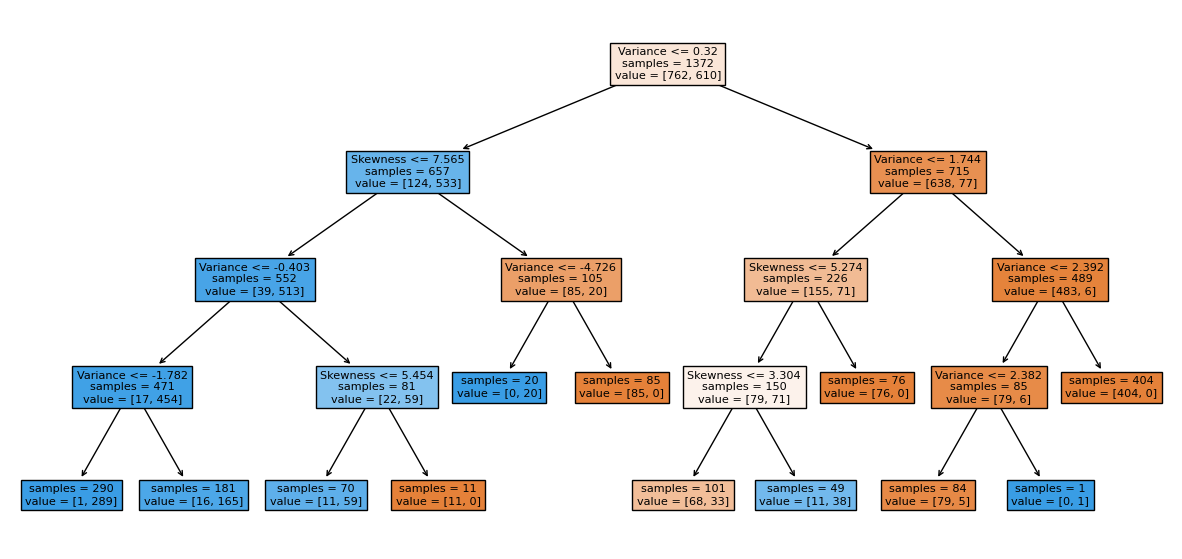

In [9]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.zip')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию `plot_decision_bound_classification()`:

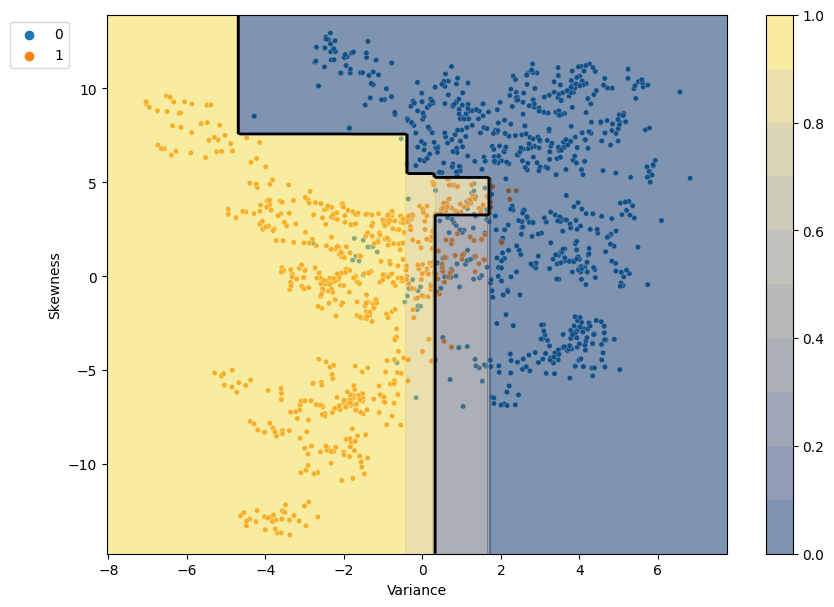

In [10]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)


В результате построения дерева было образовано 12 областей ($R_1, R_2, \dots, R_{12}$), каждая из которых соответствует одному из 12 листьев. В каждой из областей была рассчитана оценка вероятности принадлежности к каждому из классов — $P_k$. Класс объекта $\hat{y}$ определяется как класс с максимальной из этих вероятностей. Выше представлена тепловая карта вероятностей принадлежности к классу фальшивых банкнот — $\hat{P_1}$ (они отражены на тепловой шкале справа от диаграммы — области, для которых вероятности закрашены одинаковым цветом). Банкноты, для которых данная вероятность $P_1 > 0.5$, дерево считает фальшивыми, а остальные — подлинными.

# <center>Свойства алгоритма дерева решений
Схематично связь между множествами $X$ и $Y$ можно представить следующим образом:
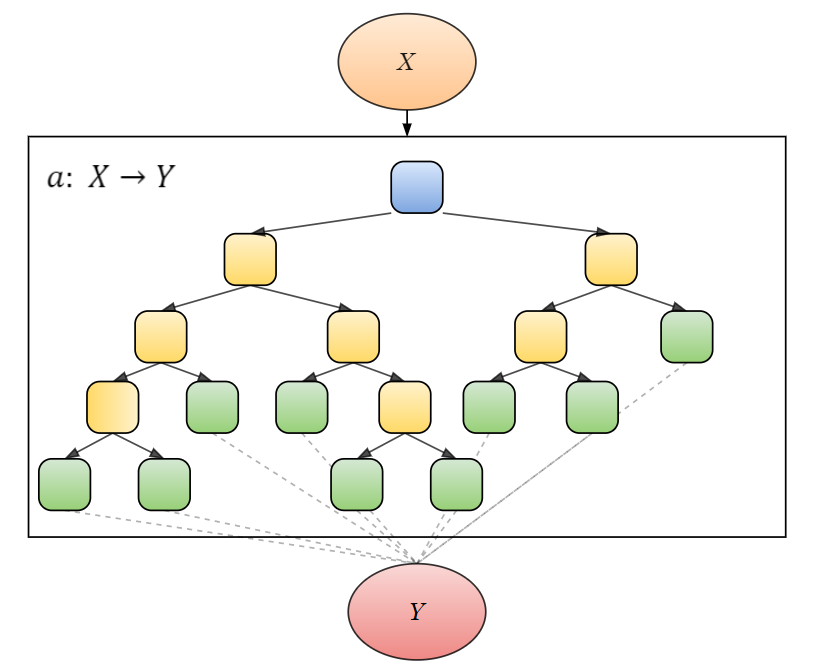

Из структуры дерева решений следует несколько интересных **свойств**:

1. Полученная функция $a(x)$ является кусочно-постоянной, а у таких функций производная равна нулю во всех точках, где задана функция. Следовательно, при поиске оптимального решения можно забыть о градиентных методах, таких как SGD.
2. В случае задачи регрессии дерево решений (в отличие от, например, линейной регрессии) не может предсказывать значения целевой переменной за границами области значений обучающей выборки (на самом деле может, но для этого нужны специальные манипуляции над данными, которые не входят в рамки данного модуля).
3. Дерево решений способно идеально приблизить обучающую выборку, но при этом ничего не выучить: для этого достаточно построить такое дерево, в каждый лист которого будет попадать только один объект.

    Такая модель будет обладать идеальным качеством на обучающей выборке, однако при её использовании на реальных данных качество будет низким. Иначе говоря, модель будет переобученной.  
    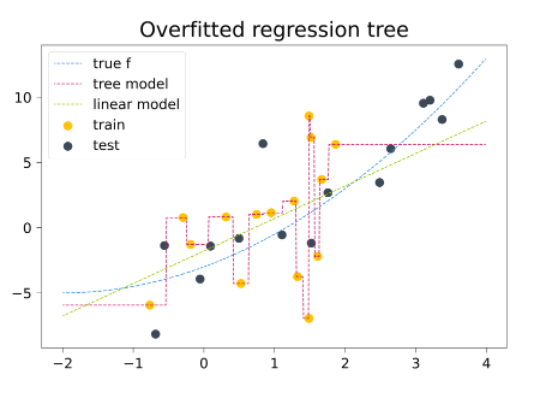  
    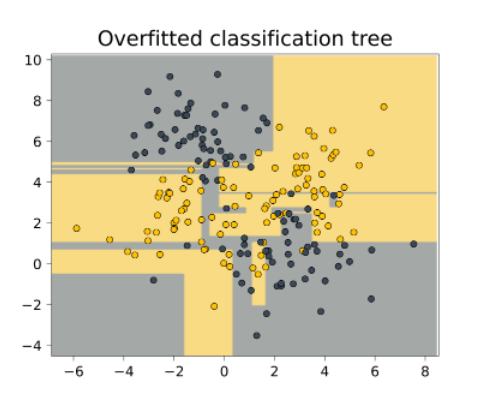


# <center>Алгоритм CART
Основные алгоритмы построения деревьев и их отличия:
* **ID3 (Iterative Dichotomiser 3)** был разработан Джоном Куинланом (как и два последующих алгоритма) в 1986 году. Алгоритм создаёт многостороннее дерево, находя для каждого узла категориальный признак, который даст наибольший информационный выигрыш. Деревья вырастают до максимального размера, а затем обычно применяется этап обрезки, чтобы улучшить обобщающую способность деревьев и избежать переобучения.

    Ограничения алгоритма:
    * все факторы должны быть категориальными;
    * предназначен для решения задач классификации.

* **C4.5** — алгоритм-преемник **ID3**. Он снимает ограничение, что факторы обязательно должны быть категориальными, путём разбиения непрерывного числового фактора на дискретный набор интервалов. **C4.5** преобразует обученные деревья в наборы правил «если, ... то». Затем оценивается точность каждого правила, чтобы определить порядок, в котором они должны применяться.
* **C5.0** — последняя лицензированная версия алгоритма. **C5.0** использует меньше памяти и создаёт меньшие наборы правил, чем **C4.5**, но при этом является более точным.

>**CART (Classification and Regression Tree)** — это алгоритм, предназначенный для построения бинарных деревьев решений. Он очень похож на C4.5, однако, в отличие от последнего, предназначен как для задач классификации, так и для задач регрессии. CART важен для нас, поскольку именно он используется для построения моделей решающих деревьев в `sklearn`.

Разбирать алгоритм мы будем по частям на простых примерах, а затем сложим их все воедино. Итак, начнём ↓
***
Пусть у нас есть множество наблюдений $x \in X$ и правильных ответов к ним $y \in Y$. 

Для конкретики рассмотрим «игрушечный» набор данных, состоящий из десяти наблюдений ($N=10$) и двух факторов ($M=2$). $x_1$ — возраст клиента (`age`), $x_2$ — доход клиента в тысячах рублей (`income`). То есть множество $X$ - это множество клиентов банка. Целевой переменной $y$ является признак дефолта заёмщика: 0 — кредит был погашен (`loan`), 1 — кредит не был погашен (`not loan`). Таким образом, множество $Y=\{0,1\}$.
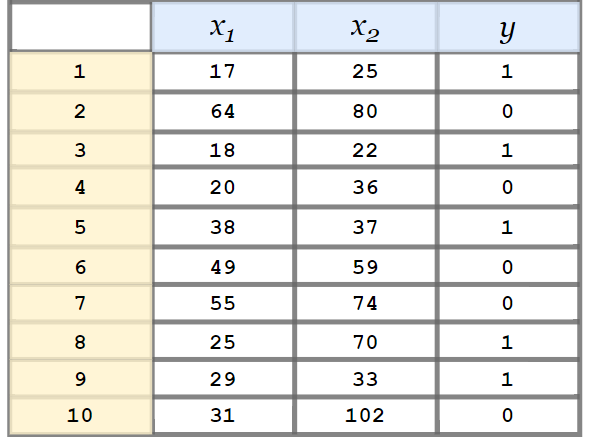

Нам необходимо построить алгоритм $a(x)$ — дерево решений, которое для клиентов из множества $X$ выдаёт ответ из множества $Y$ (выплатит ли заёмщик кредит).

Обозначим параметры буквой $w$. 

>Под **внутренними параметрами** $w$ понимается структура дерева, а именно последовательность предикатов $B_v(x_j, t) = [x_j \leq t]$ и сами параметры $j$ (номер признака, по которому строится условие в предикате) и $t$ (пороговое значение для условия), то есть $w=(j, t)$. 

Как подобрать последовательность вопросов внутри вершин дерева?

Фундамент начинается с первого кирпича, а дерево решений — с пня. Чтобы понять, как происходит построение дерева произвольной глубины, нам сначала необходимо научиться строить **решающие пни** — деревья глубины 1. Пример такого решающего пня можно увидеть ниже:
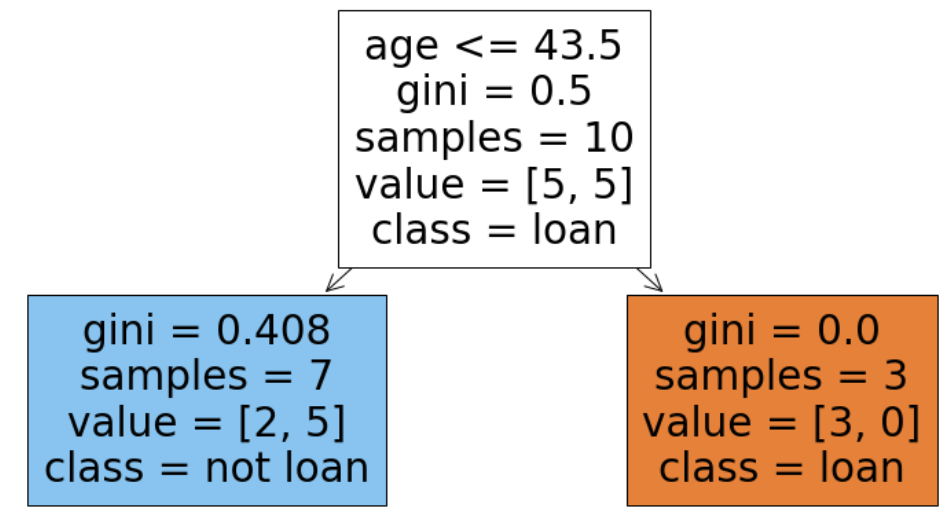

У такого дерева только одна вершина содержит предикат $B_0(x_j, t) = [x_j \leq t]$ (`age` $\leq 43.5$) — она же по совместительству является корневой. Из неё выходят две листовые вершины, которые содержат предсказания, в данном случае — классы объектов (`loan` — кредит выплачен, `not loan` — кредит не выплачен).

Ещё говорят так: корневая вершина в данном случае является **родительской**, а две другие — её **потомками**. 

Чтобы построить решающий пень, нам нужно лишь определить, какое решающее правило будет содержаться в корневой вершине. Говоря на языке машинного обучения, нам нужно найти наилучшие по заданному критерию параметры предиката — $j$ и $t$.



## Кандидаты в параметры разбиения
Введём критерий оптимальности — некоторую меру **неоднородности (impurity)** $G(X, y, w)$, которая будет  показывать, насколько большой разброс целевой переменной $y$ для объектов из множества $X$ наблюдается в дочерних вершинах при параметрах сплита $w$.  
Мы бы хотели построить пень таким образом, чтобы минимизировать эту неоднородность:
$$ G(X, y, w) \to \min_w $$
>Иначе говоря, мы хотим сделать так, чтобы разброс ответов в дочерних вершинах был как можно меньше. В идеале необходимо создать такой предикат, чтобы в левую и правую вершины попали как можно наиболее схожие объекты (например, в случае задачи классификации — объекты какого-то одного класса).

Параметры $w=(j, t)$ можно найти простым перебором. В качестве кандидата на пороговое значение $t$ можно рассматривать среднее значение между двумя соседними уникальными значениями отсортированного фактора $x_j$.  
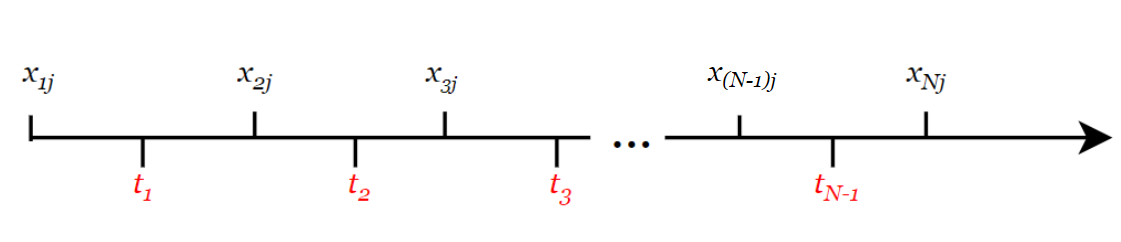  
Для каждого из возможных предикатов $B_v(x_j, t)$ нам необходимо подсчитать значение неоднородности $G(X, y, w)$ на всей выборке и определить такую комбинацию $w_{opt} = (j_{opt}, t_{opt})$, которая даёт минимум:
$$ w_{opt} = \argmin_w G(X, y, w) $$
Псевдокод такого алгоритма будет иметь вид

```python
min_loss = inf
optimal_split_params = None
for j in range(M):
    thresholds = find_candidates_for_thresholds(X[:, j], y)
    for t in thresholds:
        split_params = (j, t)
        loss = calculate_loss(X, y, split_params)
        if loss < min_loss:
            min_loss = loss
            optimal_split_params = split_params
```

Итого, если у нас есть $M$ факторов и $N$ наблюдений, то, чтобы найти оптимальные параметры разбиения, нам в худшем случае понадобится перебрать $M(N-1)$ комбинаций. 
***
**Пример поиска параметров**  
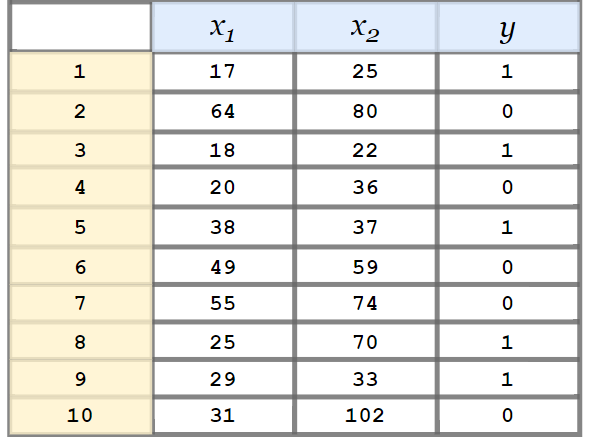

Начнём определение кандидатов в предикаты в корневую вершину с первого фактора — $x_1$ (возраста клиента). 

Для того чтобы создать пороговые значения для $x_j$, необходимо:

* Отсортировать числовой фактор $x_j$ по возрастанию:
    $$ \{x_{ij}|x_{ij} < x_{(i+1)j}\} $$

* Вычислить среднее между двумя соседними уникальными значениями фактора. Более простое название такой операции — **скользящее среднее**:
    $$ \Big\{ x_{ij}^{\text{mean}} | x_{ij}^{\text{mean}} = \frac{x_{ij} + x_{(i+1)j}}{2} \Big\} $$

Сортируем клиентов по возрастанию возраста $x_1$. Затем вычисляем среднее между двумя соседними значениями — они и будут кандидатами на пороги $t$ для фактора $x_1$.  
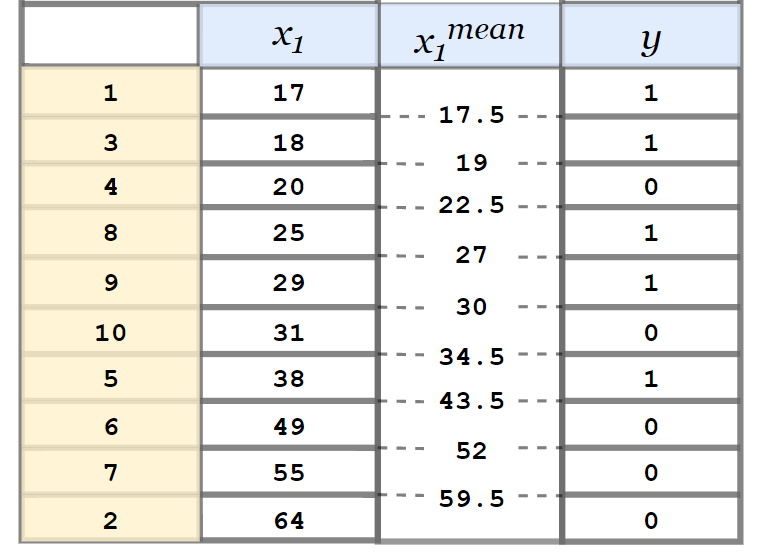

Теперь посмотрим, какие возможные пороговые значения существуют для фактора $x_2$ (дохода клиента). Проделав те же самые операции, получим:  
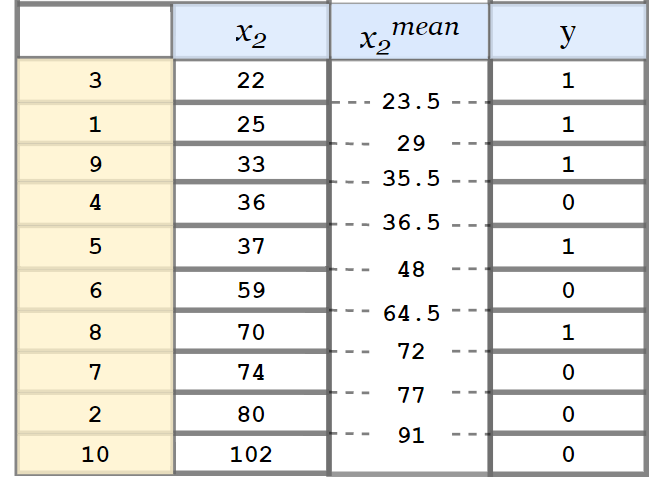

Итак, в качестве кандидатов на предикат корневой вершины $B(x_j, t)$ мы выдвигаем следующие решающие правила:
$$ [x_1 \leq 17.5], [x_1 \leq 19], \dots, [x_1 \leq 52] $$
$$ [x_2 \leq 23.5], [x_2 \leq 29], \dots, [x_2 \leq 91] $$
Итого у нас получится $M(N-1) = 2 \cdot 9 = 18$ комбинаций $j$ и $t$.  
Многовато для одной вершины в дереве. И это ещё без учёта того, что факторы в алгоритме CART сортируются, а сортировка — тоже довольно «дорогая» операция.

Рассмотрим соседние средние для возраста клиента $x_1$:  
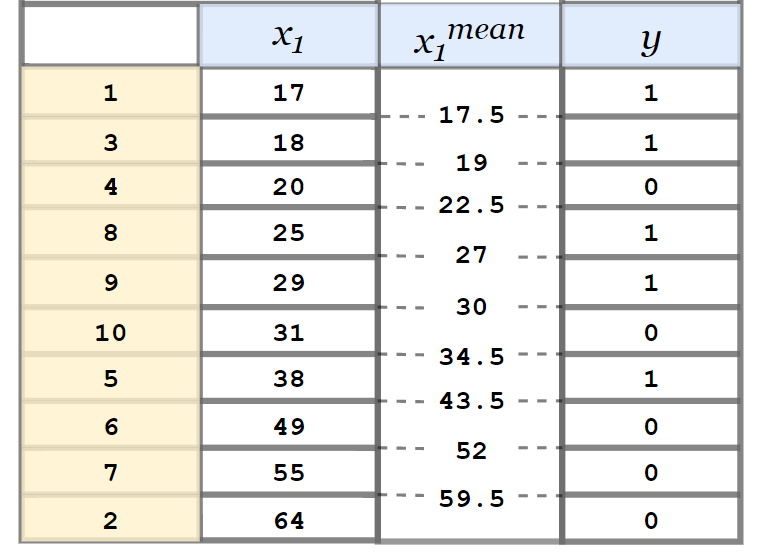

Заметим, что при переходе через пороговое среднее $17.5$ класс объекта $y$ не меняется, так же, как, например, при переходе через среднее $27$. А вот при переходе через числа $19, 22.5, 30, 34.5, 43.5$ класс 1 меняется на класс 0 и наоборот. 

Возникает вопрос: зачем рассматривать пороги, которые не дают новой информации об изменении целевой переменной?

Верно, незачем — эта информация не приносит никакой пользы и лишь увеличивает количество комбинаций. Поэтому в качестве пороговых значений $t$ для фактора $x_1$ мы будем рассматривать только те соседние средние в отсортированном столбце, при переходе через которые целевая переменная $y$ изменяется (мы отметили их красным цветом):  
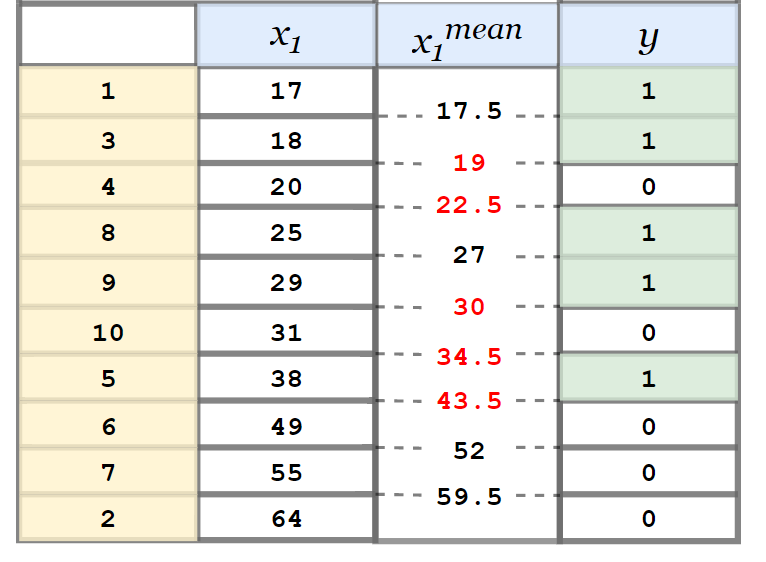

Итого вместо девяти изначальных кандидатов на порог $t$ для признака $x_1$ у нас есть пять.

Применим ту же идею для фактора $x_2$ (дохода клиента). Проделываем те же самые операции. Выберем только те пороговые средние, при которых $y$ меняется с 1 на 0 и наоборот:  
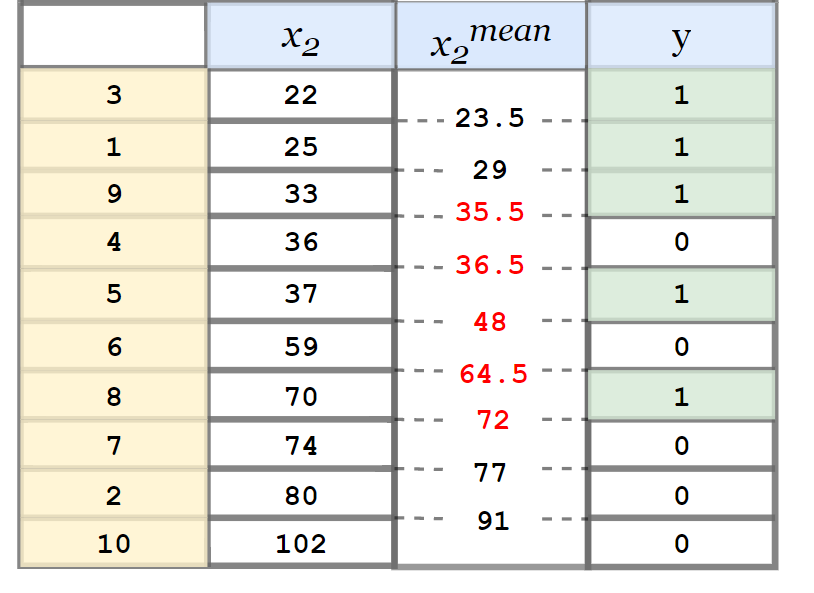

Итого вместо девяти изначальных кандидатов на порог $t$ для признака $x_2$ у нас есть пять.

В качестве кандидатов на предикат корневой вершины $B_0$ мы выдвигаем следующие решающие правила:
$$ [x_1 \leq 19], [x_1 \leq 22.5], [x_1 \leq 30], [x_1 \leq 34.5], [x_1 \leq 43.5] $$
$$ [x_2 \leq 35.5], [x_2 \leq 36.5], [x_2 \leq 48], [x_2 \leq 64.5], [x_2 \leq 72] $$
Таким образом, мы получили десять комбинаций $j$ и $i$, которые нам необходимо перебрать, чтобы найти оптимальные.

**Оптимизированный алгоритм** определения пороговых значений для фактора $x_j$:
1. Отсортировать числовой фактор $x_j$ по возрастанию:
    $$ \{x_{ij}|x_{ij} < x_{(i+1)j}\} $$

2. Вычислить среднее между двумя соседними уникальными значениями фактора. Более простое название такой операции — **скользящее среднее**:
    $$ \Big\{ x_{ij}^{\text{mean}} | x_{ij}^{\text{mean}} = \frac{x_{ij} + x_{(i+1)j}}{2} \Big\} $$
3. В качестве кандидатов на пороговые значений $t$ выбираются только те значения, при которых целевой признак меняет своё значение:
    $$ \{ x_{ij}^{\text{mean}} | y_i - y_{(i+1)} \neq 0 \} $$

# <center>Ветвление. Неоднородность
Пары объектов и ответов $y$, соответствующих им, обозначим как $Q=\{(x,y)\}$. Пусть это множество $Q$ содержит $N=|Q|$ объектов из обучающей выборки.

Как сильно ответы в выборке  различаются между собой? Иначе говоря, какой разброс целевой переменной в выборке ?

Чтобы это измерить, введём некоторую функцию $H(Q)$, которую назовём **критерием неоднородности (impurity criterion)** или **критерием информативности** (это более распространённое название). 

Предположим, что мы выбрали конкретные параметры $w$. Тогда множество $Q$ разбивается на две части ($Q^{\text{left}} = (X^{\text{left}}, y^{\text{left}})$ и $Q^{\text{right}} = (X^{\text{right}}, y^{\text{right}})$), для которых условие предиката $B(x_j, t)$ выполняется и не выполняется соответственно:
$$ Q^{\text{left}} = \{ (x, y) | x_j \leq t \} $$
$$ Q^{\text{right}} = Q \backslash Q^{\text{left}} = \{ (x, y) | x_j > t \} $$
Каждая из полученных выборок будет иметь свои размеры (мощности множеств) — обозначим их как $ N^{\text{left}} = |Q^{\text{left}}| $ и $ N^{\text{right}} = |Q^{\text{right}}| $.

Насколько уменьшился разброс целевой переменной после сплита с такими параметрами?

Для ответа на этот вопрос необходимо вычислить **взвешенную неоднородность** $G(Q, w)$ в полученных левой и правой частях:
$$ G(Q, w) = \frac{N^{\text{left}}}{N}H (Q^{\text{left}}) + \frac{N^{\text{right}}}{N}H (Q^{\text{right}}) $$

И финальный вопрос: какие параметры $w$ нам подойдут?

Нам необходимо выбрать такие параметры $w$ для предиката $B(x_j, t)$, при которых неоднородность после ветвления будет наименьшей.
$$ G(Q, w) \to \min_w $$
$$ w_{\text{opt}} = (j_{\text{opt}}, t_{\text{opt}}) = \argmin_w G(Q, w) $$
От вида функции $H(Q)$ зависит, как будет выглядеть итоговое выражение для неоднородности — её значение должно уменьшаться с уменьшением разброса ответов на выборке.

>Дополнительно введём такое понятие, как **прирост информации (information gain)**. Это разница между неоднородностью в вершине до её деления и неоднородностью после деления с параметрами $w$:
$$ IG(Q, w) = H(Q) - G(Q, w) = H(Q) - \frac{N^{\text{left}}}{N}H(Q^{\text{left}}) - \frac{N^{\text{right}}}{N}H(Q^{\text{right}}) $$
>Интерпретация $IG(Q, w)$: сколько новой информации о целевой переменной $y$ удалось получить при использовании предиката $B(x_j, t)$.
>
>На основе прироста информации определяется значимость признака $x_j$.

Кстати, можно рассматривать задачу поиска параметров в контексте прироста информации. Тогда нашей целью будет найти максимум прироста информации:
$$ IG(Q, w) \to \max_w $$
Оптимальными будут те параметры $w$, которые дают наибольший прирост информации в результате разбиения:
$$ w_{\text{opt}} = (j_{\text{opt}}, t_{\text{opt}}) = \argmax_w IG(Q, w) $$
# <center>Критерии информативости в задаче регрессии
1. **КВАДРАТИЧНАЯ ОШИБКА (SQUARED ERROR)**

    В задачах регрессии классической функцией ошибки выступает средний квадрат разницы между истинным ответом $y$ и предсказанием модели $\hat{y}$, или среднеквадратичная ошибка (MSE, Mean Squared Error). Давайте возьмём её в качестве критерия информативности:
    $$ H(Q) = \frac{1}{N}\sum_{y \in Q} (y - \hat{y})^2 $$
    Ранее мы говорили, что в качестве предсказания $\hat{y}$ модели дерева решений в задачах регрессии вычисляется среднее значение целевой переменной для объектов, попавших в вершину. Обозначаем эту величину как $\overline{y}$:
    $$ \hat{y} = \overline{y} = \frac{1}{N} \sum_{y \in Q} y $$
    Тогда, подставив значение $\hat{y}$ в формулу, получим:
    $$ H(Q) = \frac{1}{N} \sum_{y \in Q}(y - \overline{y})^2 $$
    Если присмотреться внимательно, можно заметить, что полученная формула — это формула выборочной дисперсии целевой переменной, т. е. $ H(Q) = D(y) $. Таким образом, используя критерий MSE, мы выбираем параметры сплита $w$ так, чтобы взвешенная сумма дисперсий в листьях была как можно меньше, что кажется вполне логичным.
2. **АБСОЛЮТНАЯ ОШИБКА (ABSOLUTE ERROR)**

    Вместо квадрата используем модуль разницы между истиной и предсказанием — получим среднюю абсолютную ошибку (MAE, Mean Absolute Error):
    $$ H(Q) = \frac{1}{N} \sum_{y \in Q} |y - \hat{y}| $$
    Однако в таком случае в качестве предсказания $\hat{y}$ модели дерева решений вычисляется медиана целевой переменной для объектов, попавших в корневую вершину.
    $$ H(Q) = \frac{1}{N} \sum_{y \in Q} |y - \text{median}(y)| $$
    Таким образом, данный критерий информативности измеряет отклонение целевой переменной от медианы.
3. **ПУАССОНОВСКАЯ ОШИБКА (POISSON ERROR)**

    Последний критерий, предусмотренный в sklearn, — пуассоновская ошибка. Данный критерий используется редко, но он будет хорошим выбором в задачах, где целевая переменная дискретная и подчинена распределению Пуассона (например, количество отказов оборудования).

    Формула выводится из распределения Пуассона с помощью метода максимального правдоподобия. Мы опустим саму процедуру вывода и приведём только конечный вид критерия информативности:
    $$ H(Q) = \frac{1}{N} \sum_{y \in Q} (y \log(\frac{y}{\overline{y}} - y + \overline{y})) $$

# <center>Критерии информативности в задаче классификации
Все критерии для задачи классификации, которые мы будем рассматривать, основаны на вероятности принадлежности к классу. Пусть у нас есть $K$ классов. Тогда оценка вероятности принадлежности к классу под номером $k$ определяется как:
$$ P_k = \frac{1}{N} \sum_{y \in Q} [y = k] $$
1. **ЭНТРОПИЯ ШЕННОНА (ENTROPY)**

    Первый критерий, который мы рассмотрим, — это энтропия Шеннона. Она измеряет непредсказуемость реализации случайной величины.
    $$ H(Q) = -\sum_{k=1}^K P_k \log(P_k) $$
    Основание логарифма $\log$ на самом деле не имеет значения, но традиционно используется логарифм по основанию $2$ ($\log_2$).

    Данную метрику Шеннон вывел, занимаясь вопросами кодирования строк. Однако затем выяснилось, что полученная формула очень хорошо подходит теории случайных величин. Энтропия численно отражает меру хаоса и активно используется во многих прикладных задачах — от шифрования до машинного обучения.
2. **КРИТЕРИЙ ДЖИНИ (GINI)**

    Другой способ вычислить неоднородность в случае задачи классификации — воспользоваться критерием информативности Джини:
    $$ H(Q) = \sum_{k=1}^K P_k (1-P_k) $$

# <center>Алгоритм CART: рекурсия, критерии остановки
Схематично **поэтапное построение дерева решений** выглядит следующим образом:

|||
|-|-|
|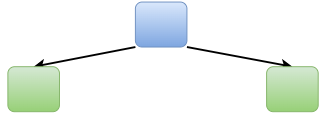|Допустим, мы построили решающий пень. В результате построения получилась одна родительская и две дочерние вершины, каждой из которых соответствует своя часть исходной выборки.|
|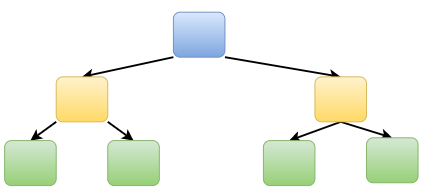|Чтобы построить следующий уровень дерева, необходимо проделать ту же процедуру построения решающего пня, но теперь уже каждая из дочерних вершин воспринимается как родительская, и её основе строится новый решающий пень. В результате получится дерево глубиной 2.|
|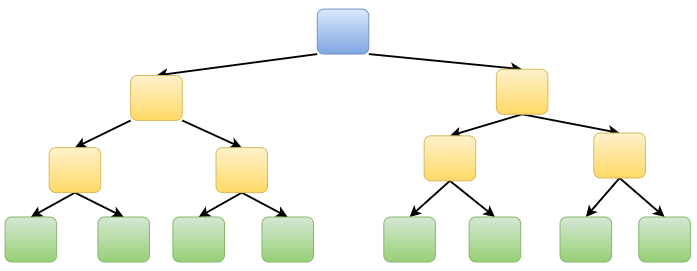|Строим следующий уровень: дочерние вершины снова воспринимаем как родительские и на их основе строим новые решающие пни. Получаем дерево глубиной 3. <p>Повторяем эти действия, пока не дойдём до некоторого предела, на котором нужно будет остановиться: например, если мы достигли идеальной однородности (все объекты относятся к одному классу).|

>Формально такой последовательный алгоритм построения дерева относится к категории жадных алгоритмов. 

Отметим, что, так как мы теперь рассматриваем не решающие пни, а деревья произвольной глубины, то в наших рассуждениях появится **индекс вершины дерева** $v$. Он вводится для того, чтобы обозначить, что та или иная величина рассчитывается для конкретной вершины.

Итак, пусть $Q_v = \{(x, y)\}$ — множество объектов и ответов к ним, попавших в вершину с номером $v$, $N_v = |Q_v|$. Пусть задан критерий информативности $H(Q)$, который зависит от задачи (регрессия — Squared Error, Absolute Error или Poisson Error, классификация — Gini или Entropy). Также задан некоторый критерий остановки рекурсии $\text{stop\_criterion}(Q_v)$.

Наш **алгоритм построения дерева решений CART** будет выглядеть следующим образом:
1. Создаём вершину под номером $v$. 
2. По умолчанию ветвление дерева решений прекращается, когда достигается однородность, то есть $H(Q_v)=0$. 

    **2.1. Если условие остановки выполнено.**

    Формируем листовую вершину $v$ и ставим в соответствие этому листу ответ, который будет выдаваться для новых объектов, которые дойдут до этого листа. Назовём эту часть `create_leaf()`.
    * В случае задачи регрессии ответ вычисляется как среднее (если критерий информативности $H(Q)$ — Squared Error или Poisson Error) или медиана (если критерий информативности — Absolute Error):
        $$ \hat{y}_v = \frac{1}{N} \sum_{y \in Q_v} y \space \space \text{ или } \space \space \hat{y}_v = \text{median}_{y \in Q_v}(y) $$
    * В случае задачи классификации ответ вычисляется как метка самого популярного среди объектов $X_v$ класса или как оценки вероятностей принадлежности $P_{vk}$ к каждому из классов:
        $$ P_{vk} = \frac{1}{N} \sum_{y \in Y_v} [y=k],$$
        $$ \hat{y}_v = \argmax_{k \in K}(P_{vk}) $$
    
    **2.2. Если условие остановки не выполнено.**

    Строим решающий пень. Формируем решающее правило $B_v(x_j, t)$ для вершины $v$. Из возможных комбинаций $w=(j, t)$ выбираем такую, которая определяет наилучшее разбиение текущего множества объектов и ответов к ним $Q_v$ на две части: $Q^{\text{left}}_v = \{ (x, y)|x_j \leq t \}$ — левую, для которой условие предиката истинно, и $Q^{\text{right}}_v = \{ (x, y)|x_j > t \}$ — правую, для которой условие предиката ложно:
    $$ G(Q, w) = \frac{N_v^{\text{left}}}{N_v}H(Q_v^{\text{left}}) + \frac{N_v^{\text{right}}}{N_v}H(Q_v^{\text{right}}) $$
    $$ w_{\text{opt}} = (j_{\text{opt}}, t_{\text{opt}}) = \argmin_{w} G(Q, w) $$
    $$ B_v(x_j, t) = [x_{j_{\text{opt}}} \leq t_{\text{opt}}] $$
    
    Эту часть алгоритма мы обозначали ранее как `best_split()`.

    В результате разбиения будут созданы два подмножества объектов — $Q_v^{\text{left}}$ и $Q_v^{\text{right}}$. На основе этих подмножеств мы с помощью рекурсии создадим две новые вершины дерева (левую и правую) и свяжем их с текущей вершиной.

    Для выборок $Q_v^{\text{left}}$ и $Q_v^{\text{right}}$ процедура будет повторяться рекурсивно, пока не выполнится критерий остановки.
3. Возвращаем созданную вершину.

## <center> Значимость признаков



